In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb # lightgbm model
from xgboost import XGBClassifier  # xgb model
from sklearn.model_selection import RandomizedSearchCV  # hyperparameters tune
import warnings as w
w.filterwarnings('ignore')

In [2]:
df = pd.read_csv("updated_pollution_dataset.csv")
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [3]:
df.shape

(5000, 10)

In [4]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [6]:
df['Air Quality'].unique()

array(['Moderate', 'Good', 'Hazardous', 'Poor'], dtype=object)

In [7]:
df.duplicated().sum()

0

# EDA

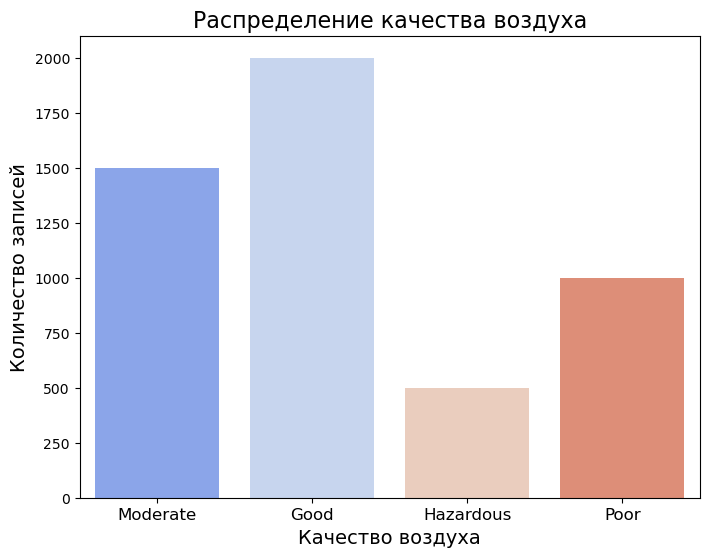

In [9]:
# Распределение целевой переменной
plt.figure(figsize=(8, 6))
sns.countplot(x='Air Quality', data=df, palette='coolwarm')
plt.title('Распределение качества воздуха', fontsize=16)
plt.xlabel('Качество воздуха', fontsize=14)
plt.ylabel('Количество записей', fontsize=14)
plt.xticks(fontsize=12)
plt.show()

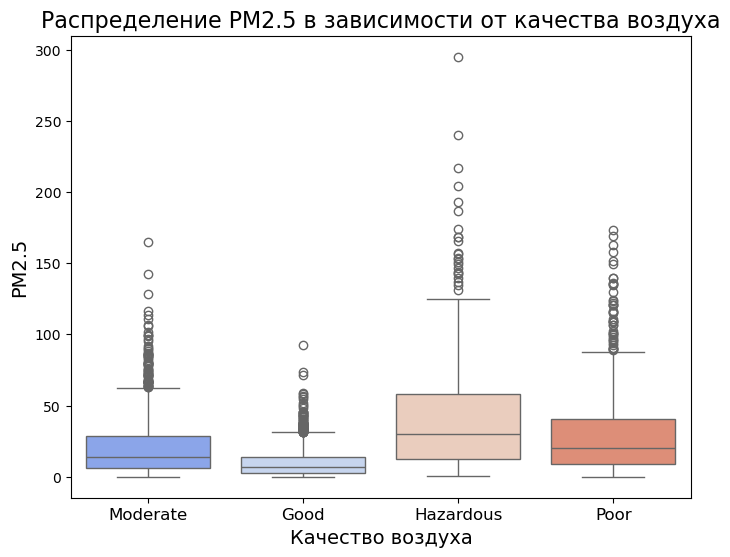

In [10]:
# Boxplot для PM2.5
plt.figure(figsize=(8, 6))
sns.boxplot(x='Air Quality', y='PM2.5', data=df, palette='coolwarm')
plt.title('Распределение PM2.5 в зависимости от качества воздуха', fontsize=16)
plt.xlabel('Качество воздуха', fontsize=14)
plt.ylabel('PM2.5', fontsize=14)
plt.xticks(fontsize=12)
plt.show()

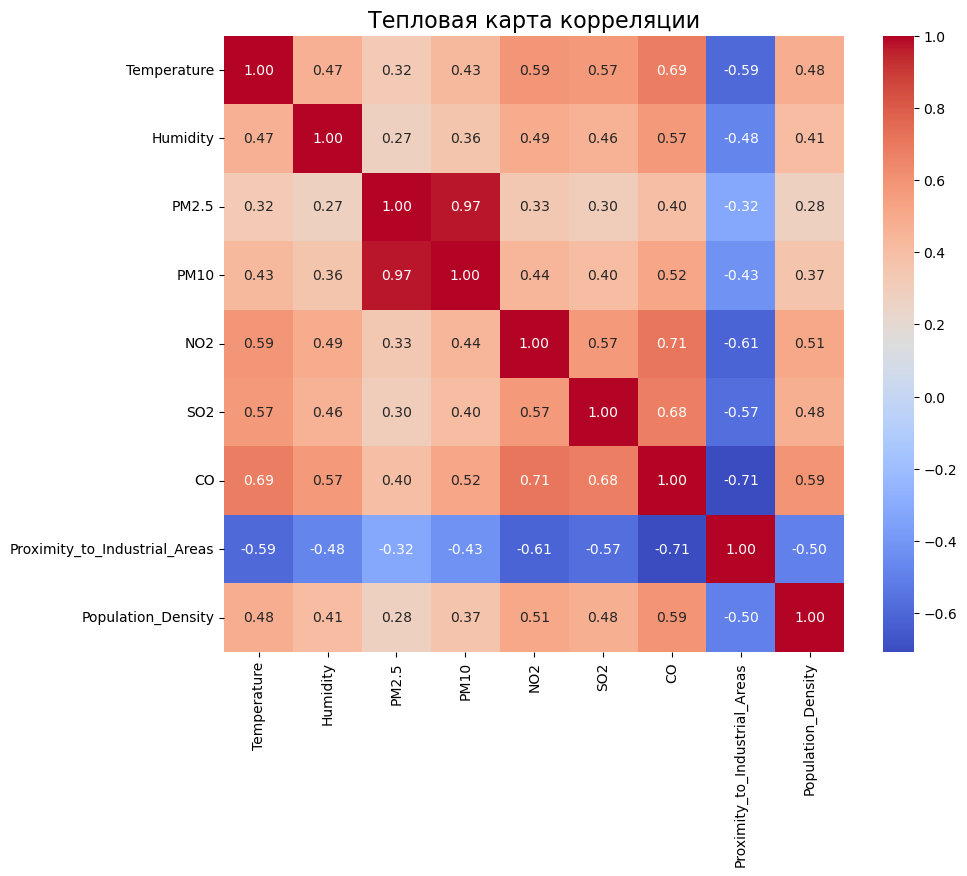

In [11]:
# Тепловая карта корреляции
# Удаление нечисловых данных для корреляции
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Построение тепловой карты
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Тепловая карта корреляции', fontsize=16)
plt.show()

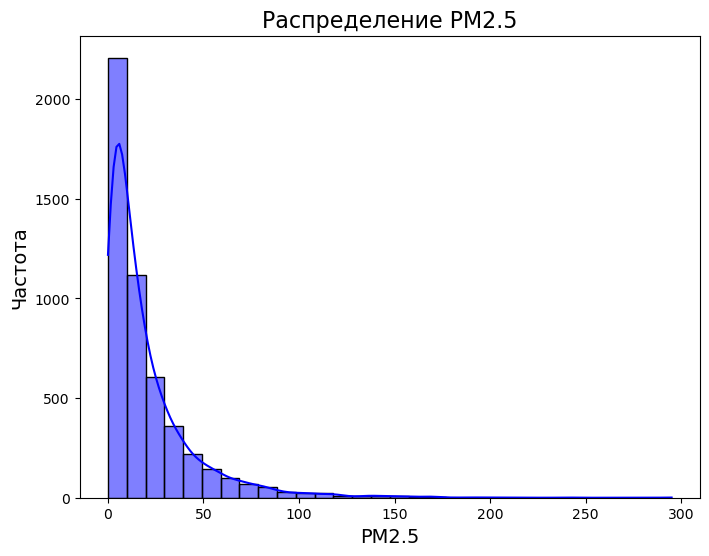

In [12]:
# Гистограмма для PM2.5
plt.figure(figsize=(8, 6))
sns.histplot(df['PM2.5'], kde=True, color='blue', bins=30)
plt.title('Распределение PM2.5', fontsize=16)
plt.xlabel('PM2.5', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.show()

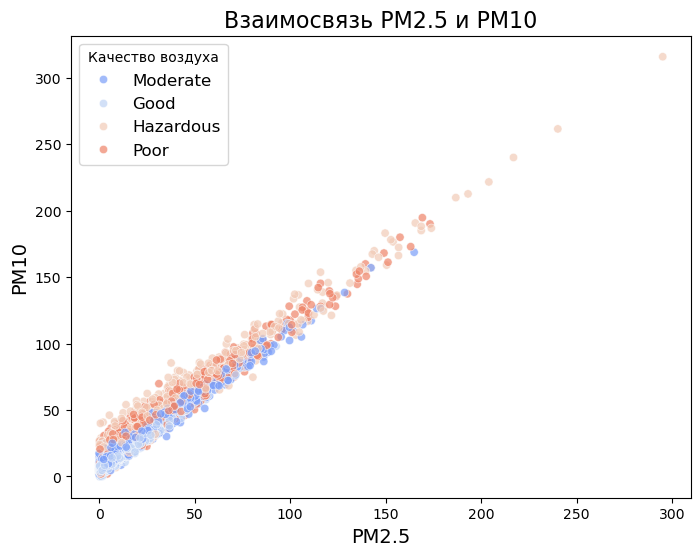

In [13]:
# Взаимосвязь PM2.5 и PM10
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PM2.5', y='PM10', data=df, hue='Air Quality', palette='coolwarm', alpha=0.7)
plt.title('Взаимосвязь PM2.5 и PM10', fontsize=16)
plt.xlabel('PM2.5', fontsize=14)
plt.ylabel('PM10', fontsize=14)
plt.legend(title='Качество воздуха', fontsize=12)
plt.show()

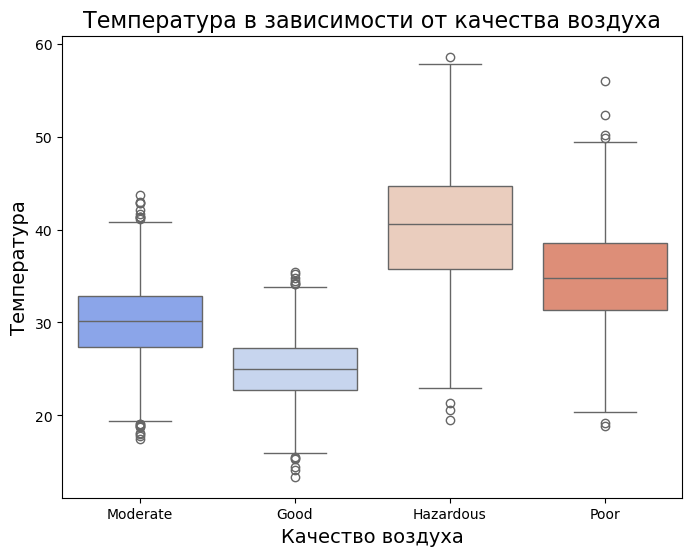

In [14]:
# Взаимосвязь температуры и качества воздуха
plt.figure(figsize=(8, 6))
sns.boxplot(x='Air Quality', y='Temperature', data=df, palette='coolwarm')
plt.title('Температура в зависимости от качества воздуха', fontsize=16)
plt.xlabel('Качество воздуха', fontsize=14)
plt.ylabel('Температура', fontsize=14)
plt.show()

# Data Preproccesing

In [16]:
# Определяем порядок
quality_mapping = {
    'Good': 0,
    'Moderate': 1,
    'Poor': 2,
    'Hazardous': 3
}

# Применяем маппинг
df['Air Quality'] = df['Air Quality'].map(quality_mapping)

# Проверяем результат
df['Air Quality'].head()

0    1
1    1
2    1
3    0
4    0
Name: Air Quality, dtype: int64

In [17]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,1
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,1
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,1
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0


In [18]:
X=df.drop('Air Quality',axis=1)
y=df['Air Quality']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
scaler=StandardScaler()
scaler.fit(X_train,y_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [30]:
RF=RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [33]:
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [40]:
gr = GradientBoostingClassifier()
gr.fit(X_train,y_train)

GradientBoostingClassifier()

In [43]:
ad = AdaBoostClassifier()
ad.fit(X_train,y_train)

AdaBoostClassifier()

In [44]:
ex = ExtraTreesClassifier()
ex.fit(X_train,y_train)

ExtraTreesClassifier()

In [45]:
lg = lgb.LGBMClassifier()
lg.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2191
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 9
[LightGBM] [Info] Start training from score -0.921932
[LightGBM] [Info] Start training from score -1.198985
[LightGBM] [Info] Start training from score -1.592089
[LightGBM] [Info] Start training from score -2.330470
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [48]:
xb = XGBClassifier()
xb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [50]:
param_dist_rf = {
    'n_estimators': np.arange(100, 500, 50),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': np.arange(2, 11, 1),
    'min_samples_leaf': np.arange(1, 11, 1),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(random_state = 42)

rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = param_dist_rf, cv = 5, n_jobs = -1,\
                              scoring = 'accuracy', n_iter = 10, random_state = 42)
rf_random.fit(X_train, y_train)

print(f'Best Parameters: {rf_random.best_params_}')
print(f'Best Score: {rf_random.best_score_}')

Best Parameters: {'n_estimators': 400, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
Best Score: 0.954


In [51]:
y_pred_RF=RF.predict(X_test)
y_pred_DT=DT.predict(X_test)

In [52]:
print(confusion_matrix(y_test,y_pred_DT))
print()
print(classification_report(y_test,y_pred_DT))

[[408   1   0   0]
 [  3 264  26   1]
 [  0  10 149  27]
 [  0   0  19  92]]

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       409
           1       0.96      0.90      0.93       294
           2       0.77      0.80      0.78       186
           3       0.77      0.83      0.80       111

    accuracy                           0.91      1000
   macro avg       0.87      0.88      0.88      1000
weighted avg       0.92      0.91      0.91      1000



In [53]:
print(confusion_matrix(y_test,y_pred_RF))
print()
print(classification_report(y_test,y_pred_RF))

[[409   0   0   0]
 [  0 285   9   0]
 [  0  10 166  10]
 [  0   0  16  95]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.97      0.97      0.97       294
           2       0.87      0.89      0.88       186
           3       0.90      0.86      0.88       111

    accuracy                           0.95      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.96      0.95      0.95      1000



In [54]:
y_pred_log=log.predict(X_test)

In [55]:
print(confusion_matrix(y_test,y_pred_log))
print()
print(classification_report(y_test,y_pred_log))

[[409   0   0   0]
 [  0 282  12   0]
 [  0  13 165   8]
 [  0   0  20  91]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.96      0.96      0.96       294
           2       0.84      0.89      0.86       186
           3       0.92      0.82      0.87       111

    accuracy                           0.95      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.95      0.95      0.95      1000



In [56]:
y_pred_gr=gr.predict(X_test)
y_pred_ad=ad.predict(X_test)
y_pred_ex=ex.predict(X_test)

In [57]:
print(confusion_matrix(y_test,y_pred_gr))
print()
print(classification_report(y_test,y_pred_gr))

[[409   0   0   0]
 [  3 282   9   0]
 [  0   9 168   9]
 [  0   0  15  96]]

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       409
           1       0.97      0.96      0.96       294
           2       0.88      0.90      0.89       186
           3       0.91      0.86      0.89       111

    accuracy                           0.95      1000
   macro avg       0.94      0.93      0.93      1000
weighted avg       0.96      0.95      0.95      1000



In [60]:
print(confusion_matrix(y_test,y_pred_ad))
print()
print(classification_report(y_test,y_pred_ad))

[[408   1   0   0]
 [  4 238  52   0]
 [  0  20 129  37]
 [  0   1  27  83]]

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       409
           1       0.92      0.81      0.86       294
           2       0.62      0.69      0.65       186
           3       0.69      0.75      0.72       111

    accuracy                           0.86      1000
   macro avg       0.80      0.81      0.81      1000
weighted avg       0.87      0.86      0.86      1000



In [62]:
print(confusion_matrix(y_test,y_pred_ex))
print()
print(classification_report(y_test,y_pred_ex))

[[409   0   0   0]
 [  0 286   8   0]
 [  0   9 171   6]
 [  0   0  18  93]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.97      0.97      0.97       294
           2       0.87      0.92      0.89       186
           3       0.94      0.84      0.89       111

    accuracy                           0.96      1000
   macro avg       0.94      0.93      0.94      1000
weighted avg       0.96      0.96      0.96      1000



In [64]:
y_pred_lg=lg.predict(X_test)
y_pred_xb=xb.predict(X_test)

In [66]:
print(confusion_matrix(y_test,y_pred_lg))
print()
print(classification_report(y_test,y_pred_lg))

[[409   0   0   0]
 [  1 285   8   0]
 [  0  10 168   8]
 [  0   0  11 100]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.97      0.97      0.97       294
           2       0.90      0.90      0.90       186
           3       0.93      0.90      0.91       111

    accuracy                           0.96      1000
   macro avg       0.95      0.94      0.95      1000
weighted avg       0.96      0.96      0.96      1000



In [67]:
print(confusion_matrix(y_test,y_pred_xb))
print()
print(classification_report(y_test,y_pred_xb))

[[409   0   0   0]
 [  1 280  13   0]
 [  0   8 173   5]
 [  0   0  12  99]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.97      0.95      0.96       294
           2       0.87      0.93      0.90       186
           3       0.95      0.89      0.92       111

    accuracy                           0.96      1000
   macro avg       0.95      0.94      0.95      1000
weighted avg       0.96      0.96      0.96      1000



In [68]:
best_RF = RandomForestClassifier(
    n_estimators=400,
    min_samples_split=9,
    min_samples_leaf=5,
    max_features='sqrt',
    max_depth=20,
    bootstrap=True,
    random_state=42
)

# Обучение модели
best_RF.fit(X_train, y_train)

# Оценка модели
y_pred_best_RF = best_RF.predict(X_test)

print(confusion_matrix(y_test, y_pred_best_RF))
print(classification_report(y_test, y_pred_best_RF))

[[409   0   0   0]
 [  1 284   9   0]
 [  0  11 166   9]
 [  0   0  14  97]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.96      0.97      0.96       294
           2       0.88      0.89      0.89       186
           3       0.92      0.87      0.89       111

    accuracy                           0.96      1000
   macro avg       0.94      0.93      0.94      1000
weighted avg       0.96      0.96      0.96      1000



In [103]:

# Создание тестового примера
new_data = pd.DataFrame({
    "Temperature": [25.5],
    "Humidity": [60.0],
    "PM2.5": [12.0],
    "PM10": [20.0],
    "NO2": [18.0],
    "SO2": [5.0],
    "CO": [1.5],
    "Proximity_to_Industrial_Areas": [10.0],
    "Population_Density": [500],
})

# Преобразование данных (если вы использовали StandardScaler или другие методы)
# Предположим, что StandardScaler уже был обучен на тренировочных данных
new_data_scaled = scaler.transform(new_data)  # Замените `scaler` на ваш объект StandardScaler

# Предсказание класса с помощью модели best_RF
prediction = best_RF.predict(new_data_scaled)

# Если метки классов категориальные, можно отобразить читаемый класс
print("Качество воздуха:", prediction[0])


Качество воздуха: 1


In [105]:
label_mapping = {
    0: 'Good',
    1: 'Moderate',
    2: 'Poor',
    3: 'Hazardous'
}

# Используем числовое предсказание для получения читаемой метки
readable_prediction = label_mapping[prediction[0]]

print("Качество воздуха:", readable_prediction)

Качество воздуха: Moderate
